# Answers to exercise 1.1
## Most code borrowed from Veronica

Importing different needed packages

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from PIL import Image 
from skimage import transform
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm


import seaborn as sns

from os import walk #Used for getting all the filenames from a given directory !!!!!MAYBE NOT NECESSARY!!!!!
import glob #For finding specific file types


%run -i ../fyp2021p3_group00_functions.py

## Loading in the files

In [8]:
#load all images of type .jpg
im_file_list2 = glob.glob("../data/example_image/*.jpg")
#load all maps of type .png
map_file_list2 = glob.glob("../data/example_segmentation/*.png")

#im_files = sorted(im_file_list2, key = uniq)
im_files = sorted(im_file_list2)
len(im_files)

#map_files = sorted(map_file_list2, key = uniq)
map_files = sorted(map_file_list2)
len(map_files)         


150

In [9]:
# Loading the true file in
true = pd.read_csv('../data/example_ground_truth.csv')

# It is already sorted why it is not sorted as the others

# Making a dictionary to find the id from the index
pic_id = dict()

for i in range(150):
    pic_id[i] = true['image_id'][i]
    


## Loading images into a list

In [10]:
#Load in all .jpg files from the 'example_image' folder
images = [plt.imread(file) for file in im_files]
#Load in all .png files from the 'example_segmentation' folder
maps = [plt.imread(file) for file in map_files]

## Explore an image from the dataset

In [ ]:
# Load an image and display it

im = plt.imread('../data/example_image/ISIC_0001769.jpg')
plt.imshow(im)

In [ ]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)

#Other packages might wrap the image in a different class - you are allowed to use those if you want

In [ ]:
# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[2000,2000,:])

# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')

In [ ]:
# Display only a part of the image

im_part = im[60:120,130:220,:]
plt.imshow(im_part)

In [ ]:
# Modify the image by setting some pixels to black

im_copy = im_part.copy()


im_copy[0:10,0:10,:] = np.tile(0, [10, 10, 3])
plt.imshow(im_copy)

In [ ]:
# Load the mask and display it

mask= plt.imread('../data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')
print(mask.shape)
print(mask.dtype)

In [ ]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

In [ ]:
# Show the images overlayed, for this we can use PIL 


# Load images as Image objects  
img1 = Image.open('../data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('../data/example_segmentation/ISIC_0001769_segmentation.png') 

# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 

#Display
plt.imshow(img2, cmap='gray')

# Note that this is a single channel image
print(img2.shape)

In [ ]:
# Alternative: replace the non-lesion pixels

img1 = im.copy()
img1[mask==0] = 0
  
# Display 
plt.imshow(img1)

# You can use any package you prefer, but beware you might need to convert between formats

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img1 = plt.imread('../data/example_image/ISIC_0001769.jpg')
gray = rgb2gray(img1)

plt.imshow(gray, cmap='gray')

In [ ]:
plt.hist(gray)

In [ ]:
img2 = gray < 120
plt.imshow(img2, cmap='gray')

In [ ]:
plt.imshow(img1)

In [ ]:
plt.imshow(mask)

In [ ]:
img1 = im.copy() #Copy the OG img

img1[mask!=0] = im[800,1600,:] #where the mask is black the image should also be black (any RGB color can be used)
img1[mask==0] = 0

plt.imshow(img1)

In [ ]:
figure, axes = plt.subplots() 
cc = plt.Circle(( 0.5 , 0.5 ), 0.4, color = 'white' ) 
 

axes.set_facecolor('black')

axes.set_aspect( 1 ) 
axes.add_artist( cc ) 

#plt.show()
#plt.savefig('circle.png')


In [ ]:
circ = plt.imread('circle.png')
circle = circ[50:250,125:330,:]

plt.imshow(circle)
#plt.imsave('circle.png', circle)

## Converting an image to 1 dimension (Fact check this)

In [ ]:
#Converting an image to a 1 dimensional image

circle = Image.open('circle.png').convert('L')

circle = np.asarray(circle)
plt.imshow(circle)

print(circle.shape)

In [ ]:
area, perimiter = measure_area_perimeter(circle)

perimiter/area

## Exercise 2

### Expectations for a perfect circle
The area will be pi*r^2 and the perimiter will be 2pi*r

## Scatterplot

In [ ]:
areas = []
peris = []
for i in maps:
    area, perimiter = measure_area_perimeter(i)
    areas.append(area)
    peris.append(perimiter)


In [ ]:
#np.savetxt("../data/features/perimeter.csv", peris, delimiter=",")

In [ ]:
def scatterplot(x, y):
    # Define the size of the figure
    fig = plt.figure(figsize=(4, 3))
    # Set axes, that you want to work with:
    axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
    # actually plot the data:
    axes.scatter(x, y, label = 'Data', edgecolors='white')
    #axes.legend(loc='upper left'); axes.set_xlabel(data); axes.set_ylabel(data); axes.set_title('Scatter plot');
    return None

In [ ]:
scatterplot(areas, peris)

In [ ]:
%run -i ../fyp2021p3_group00_functions.py

In [ ]:
area, perimiter = measure_area_perimeter(mask)

# ABC feature

## Asymmetry

### Finding the center
Thanks to Gino for the idea to the code

In [ ]:
image_mask = maps[1]

borders = np.where(image_mask == 1) # This will return 2 arrays with the index where the pixels are ones
up, down, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
center = ((left + right)//2, (up+down) //2) # Tuple with the coordinates for the center of the lesion

plt.imshow(maps[1])

center

In [ ]:
mask = maps[1]

borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
left, right = min(borders[1]), max(borders[1])
centerx = (left + right)//2

radiusdiff = (centerx - left) - (right - centerx)

plt.imshow(maps[146])

find the border[1] minimimum and border[1] maximum and then measurre the distance from the center to each of those points, rotate imageg X dergrees and do it again. 
Add the squared difference to a constant and then divide it by the area. 



In [14]:
areas = np.genfromtxt('../data/features/areas.csv', delimiter=',')
perimeters = np.genfromtxt('../data/features/perimeter.csv', delimiter=',')
asymmetry = np.genfromtxt('../data/features/assymmetry.csv', delimiter=',')

In [ ]:
def assymmetry(mapID):
    mask = maps[mapID]
    
    borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
    up, down, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
    center = ((left + right)//2, (up+down) //2) # Tuple with the coordinates for the center of the lesion
    
    difference = 0
    
    for i in range(18):
        borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
        left, right = min(borders[1]), max(borders[1])
        
        
        radiusdiff = (center[0]-left) - (right-center[0])
        difference += radiusdiff**2
        mask = transform.rotate(mask, 10, center = center)
    return difference/areas[mapID]
        

In [ ]:
assymmetrylist = []

for i in range(150):
    assymmetrylist.append(assymmetry(i))
    
#np.savetxt("../data/features/assymmetry.csv", assymmetrylist, delimiter=",")

In [47]:
assymmetrypd = pd.DataFrame(asymmetry)
areaspd = pd.DataFrame(areas)
peripd = pd.DataFrame(perimeters)
papd = pd.DataFrame(pa)

true['asymmetry'] = assymmetrypd
true['area'] = areaspd
true['perimeter'] = peripd
true['peri/area'] = pa

allfeatures = pd.DataFrame(true)

allfeatures['unhealthy'] = 0

for i in range(150):
    if allfeatures['melanoma'][i] == 1 or allfeatures['seborrheic_keratosis'][i] == 1:
        allfeatures['unhealthy'][i] = 1


allfeatures

<ipython-input-47-86394776488e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allfeatures['unhealthy'][i] = 1


,image_id,melanoma,seborrheic_keratosis,assymmetry,area,perimeter,peri/area,unhealthy,asymmetry
0,ISIC_0001769,0,0,0.082240,216160.0,20601.0,0.095304,0,0.082240
1,ISIC_0001852,0,0,0.096948,130493.0,14625.0,0.112075,0,0.096948
2,ISIC_0001871,0,0,0.007147,205116.0,18368.0,0.089549,0,0.007147
3,ISIC_0003462,0,0,0.018892,161705.0,14381.0,0.088934,0,0.018892
4,ISIC_0003539,0,0,0.154463,317040.0,21762.0,0.068641,0,0.154463
...,...,...,...,...,...,...,...,...,...
145,ISIC_0015443,0,0,0.039940,9732988.0,135731.0,0.013945,0,0.039940
146,ISIC_0015445,0,0,0.682602,12049938.0,202926.0,0.016840,0,0.682602
147,ISIC_0015483,0,0,0.034185,8856478.0,136170.0,0.015375,0,0.034185
148,ISIC_0015496,0,0,0.006164,8951522.0,135296.0,0.015114,0,0.006164


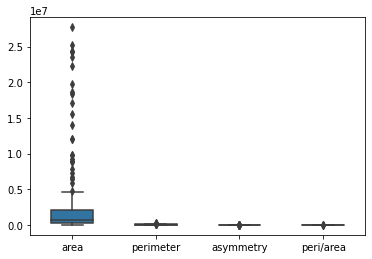

In [27]:
# Plotting the features

onlyfeatures = allfeatures[['area','perimeter', 'asymmetry', 'peri/area']]
sns.boxplot(data=onlyfeatures, width=0.5)

1.924386576016938e-17
1.0


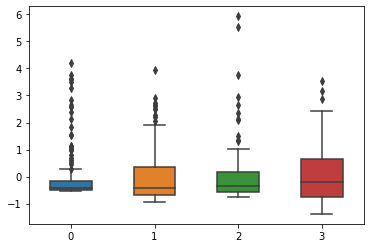

In [30]:
# Scaling the features

#Fit scaler on our data
scaler = preprocessing.StandardScaler().fit(onlyfeatures)

#Apply to data itself
normfeatures = scaler.transform(onlyfeatures)

print(normfeatures.mean()) #small number close to 0, round of error
print(normfeatures.var())  #equal to 1 
sns.boxplot(data=normfeatures, width=0.5,fliersize=5) #we see both negative and positive values, since the mean is 0



C:\Users\adagi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


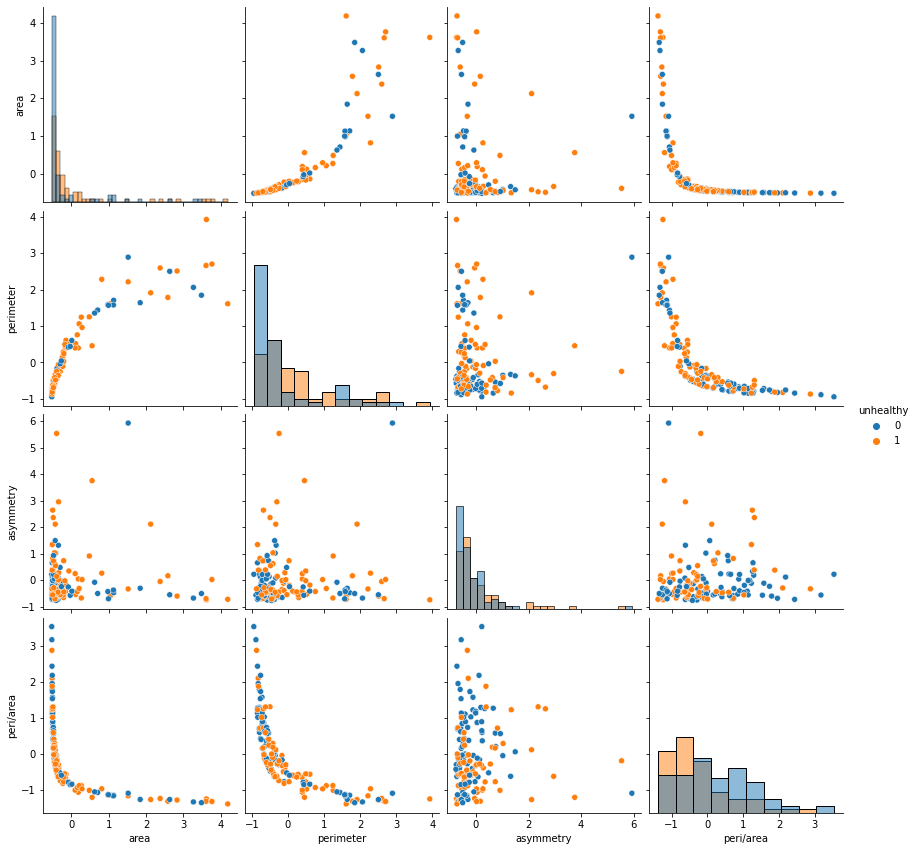

In [53]:
normfeatures = pd.DataFrame(normfeatures, columns = ['area','perimeter', 'asymmetry', 'peri/area'])

# Look at values per class
normfeatures['unhealthy'] = allfeatures['unhealthy']



sns.pairplot(normfeatures, hue="unhealthy", size=3,diag_kind="hist")

In [71]:
# Split the data before feature selection
from sklearn.model_selection import train_test_split

# Some noisy data not correlated
noise = np.random.RandomState(42).uniform(0, 0.1, size=(normfeatures.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((normfeatures[['area', 'perimeter','asymmetry', 'peri/area' ]], noise))
y = normfeatures['unhealthy']

# Split dataset to select feature and evaluate the classifier
X_dev, X_test, y_dev, y_test = train_test_split(
        X, y, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(
        X_dev, y_dev, stratify=y_dev)

In [142]:
selector = SelectKBest(mutual_info_classif, k=4)
selector.fit(X_train, y_train)

scores = selector.scores_


In [143]:
# Select features that had good scores on training set
X_train1 = X_train[:, [0,3]]
X_train2 = selector.transform(X_train)

# Train a classifier
knn1 = KNeighborsClassifier(n_neighbors=1) # other hyperparameters possible
knn1trained = knn1.fit(X_train2, y_train)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2trained = knn2.fit(X_train2, y_train)

tree1 = DecisionTreeClassifier() # various hyperparameters
tree1trained = tree1.fit(X_train2, y_train)

svm1 = svm.SVC()
svmtrained = svm1.fit(X_train2, y_train)


In [144]:
#Select the same features as before
X_val1 = X_val[:, [0,3]]
X_val2 = selector.transform(X_val)

y_val_knn1 = knn1trained.predict(X_val2)
y_val_knn2 = knn2trained.predict(X_val2)
y_val_svm1 = svmtrained.predict(X_val2)
y_val_tree = tree1trained.predict(X_val2)

# Simple accuracy
print(np.sum(y_val_knn1 == y_val) / np.size(y_val) * 100)
print(np.sum(y_val_knn2 == y_val) / np.size(y_val) * 100)
print(np.sum(y_val_svm1 == y_val) / np.size(y_val) * 100)
print(np.sum(y_val_tree == y_val) / np.size(y_val) * 100)

57.14285714285714
57.14285714285714
64.28571428571429
57.14285714285714


In [ ]:
sns.scatterplot('assymmetry', 'peri/area' , hue ='melanoma', data = true)

In [ ]:
cancer = []
for num, i in enumerate(assymmetrylist):
    if i > 0.2:
        cancer.append(num)
        
for i in cancer: 
    if true['melanoma'][i] == 1:
        print(i, 'melanomia', assymmetrylist[i])
    elif true['seborrheic_keratosis'][i] == 1:
        print(i, 'seborrheic_keratosis', assymmetrylist[i])
    else:
        print(i, 'no cancer', assymmetrylist[i])

## Border

In [ ]:
#making the perimiter divided by area feature

pa = []
for i in range(150): 
    area, perimiter = measure_area_perimeter(maps[i])
    pa.append(perimiter/area)
    

In [16]:
# Read in the perimiter divided by area feature file

pa = np.genfromtxt('../data/features/perimeterdivarea.csv', delimiter=',')


In [ ]:
sum(true['seborrheic_keratosis'])

## The lower the value, the larger chance of cancer

In [ ]:
cancer = []
for num, i in enumerate(pa):
    if i < 0.025:
        cancer.append(num)
        
for i in cancer: 
    if true['melanoma'][i] == 1:
        print(i, 'melanomia')
    elif true['seborrheic_keratosis'][i] == 1:
        print(i, 'seborrheic_keratosis')
    else:
        print(i, 'no cancer')

In [ ]:
plt.imshow(maps[148])

In [ ]:
sns.histplot(pa, bins = 20)

In [ ]:
plt.imshow(images[77])

In [ ]:
ap = []
for i in range(150): 
    area, perimiter = measure_area_perimeter(maps[i])
    ap.append(area/perimiter)
    
print(ap)

In [ ]:
sns.histplot(ap)